In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Reading the dataset

In [121]:
transactions=pd.read_excel("KPMG_data.xlsx",sheet_name="Transactions",skiprows=1)
new_cust=pd.read_excel("KPMG_data.xlsx",sheet_name="NewCustomerList",skiprows=1)
cust_demo=pd.read_excel("KPMG_data.xlsx",sheet_name="CustomerDemographic",skiprows=1)
cust_addr=pd.read_excel("KPMG_data.xlsx",sheet_name="CustomerAddress",skiprows=1)

In [124]:
new_cust['past_3_years_bike_related_purchases'].sum()

49836

In [3]:
transactions.shape

(20000, 13)

In [4]:
cust_demo.shape

(4000, 13)

In [5]:
cust_addr.shape

(3999, 6)

## Task1: Data Quality Assessment

### 1. CustomerDemographics data quality check

In [6]:
cust_demo.shape

(4000, 13)

In [7]:
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [8]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.4+ KB


In [9]:
#cust_demo['customer_id'].nunique()
cust_demo['customer_id'].nunique()
#cust_demo['customer_id'].max()

4000

In [10]:
cust_demo['first_name'].nunique()

3139

In [11]:
cust_demo['last_name'].isnull().sum()

125

In [12]:
cust_demo['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [13]:
cust_demo['DOB'].nunique()

3448

In [14]:
cust_demo['DOB'].min()

Timestamp('1843-12-21 00:00:00')

In [15]:
cust_demo['DOB'].max()

Timestamp('2002-03-11 00:00:00')

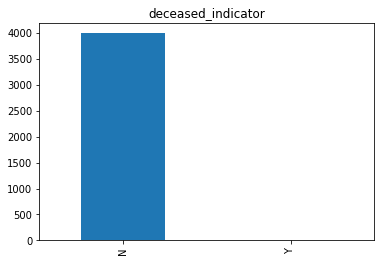

In [16]:
value_counts = cust_demo['deceased_indicator'].value_counts()

value_counts.plot.bar(title = 'deceased_indicator')

In [17]:
cust_demo['default'].nunique()

90

In [18]:
cust_demo['job_industry_category'].nunique()

9

In [19]:
cust_demo['job_title'].nunique()

195

In [20]:
cust_demo.shape

(4000, 13)

#### Data cleanup

In [21]:
cust_demo1=cust_demo.drop(columns=['default'])

In [22]:
cust_demo1['job_industry_category']=cust_demo1['job_industry_category'].fillna('Unknown')

In [23]:
cust_demo1['gender'] = cust_demo1['gender'].replace(['Female', 'Femal'], 'F')
cust_demo1['gender'] = cust_demo1['gender'].replace(['Male'], 'M')

In [24]:
cust_demo1['last_name']=cust_demo1['last_name'].fillna('Unknown')

In [25]:
cust_demo1['job_title']=cust_demo1['job_title'].fillna('Unknown')

In [26]:
now = pd.Timestamp('now')
cust_demo1['age'] = ((now - cust_demo1['DOB'])/365).dt.days

In [27]:
cust_demo1['age'].max()

176.0

In [28]:
cust_demo1.count()

customer_id                            4000
first_name                             4000
last_name                              4000
gender                                 4000
past_3_years_bike_related_purchases    4000
DOB                                    3913
job_title                              4000
job_industry_category                  4000
wealth_segment                         4000
deceased_indicator                     4000
owns_car                               4000
tenure                                 3913
age                                    3913
dtype: int64

In [29]:
cust_demo_age=cust_demo1[cust_demo1['age'] >= 122]
cust_demo_age.shape

(1, 13)

In [30]:
cust_demo2 = cust_demo1[cust_demo1['age'] < 122]

In [31]:
cust_demo2.drop(['DOB'],axis=1,inplace=True)

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
cust_demo2.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
dtype: int64

In [33]:
cust_demo2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0
1,2,Eli,Bockman,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0
2,3,Arlin,Dearle,M,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66.0
3,4,Talbot,Unknown,M,33,Unknown,IT,Mass Customer,N,No,7.0,58.0
4,5,Sheila-kathryn,Calton,F,56,Senior Editor,Unknown,Affluent Customer,N,Yes,8.0,43.0


### 2. transactions data quality check

In [34]:
transactions.shape

(20000, 13)

In [35]:
transactions['customer_id'].nunique()

3494

In [36]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [37]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [38]:
transactions['product_first_sold_date'].head()

0    41245.0
1    41701.0
2    36361.0
3    36145.0
4    42226.0
Name: product_first_sold_date, dtype: float64

In [39]:
transactions['product_id'].nunique()

101

In [40]:
transactions['transaction_id'].nunique()

20000

In [41]:
transactions['online_order'].unique()

array([ 0.,  1., nan])

In [42]:
transactions['transaction_date'].max()
#transactions['transaction_date'].min()

Timestamp('2017-12-30 00:00:00')

* check if the customers from CustomerDemographics are in transactions

In [43]:
transactions['customer_id'].isin(cust_demo['customer_id']).value_counts()

True     19997
False        3
Name: customer_id, dtype: int64

In [44]:
transactions['customer_id'].isin(cust_addr['customer_id']).value_counts()

True     19968
False       32
Name: customer_id, dtype: int64

In [45]:
cust_demo['customer_id'].isin(cust_addr['customer_id']).value_counts()

True     3996
False       4
Name: customer_id, dtype: int64

In [46]:
cust_addr['customer_id'].isin(cust_demo['customer_id']).value_counts()

True     3996
False       3
Name: customer_id, dtype: int64

### Data Cleanup

In [47]:
transactions1 = transactions[transactions['brand'].notnull()]

In [48]:
transactions1['online_order'].fillna('Unknown',inplace = True)

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [49]:
transactions1.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [50]:
transactions1['product_first_sold_date'] = pd.to_datetime(transactions1['product_first_sold_date'])

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
transactions1.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226
5,6,25,2339,2017-03-08,1,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,1970-01-01 00:00:00.000039031
6,7,22,1542,2017-04-21,1,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1970-01-01 00:00:00.000034165
7,8,15,2459,2017-07-15,0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,1970-01-01 00:00:00.000039915
8,9,67,1305,2017-08-10,0,Approved,Solex,Standard,medium,large,1071.23,380.74,1970-01-01 00:00:00.000033455
9,10,12,3262,2017-08-30,1,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1970-01-01 00:00:00.000038216


### 3. CustomerAddress data quality check

In [52]:
cust_addr.shape

(3999, 6)

In [53]:
cust_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [54]:
cust_addr['customer_id'].nunique()

3999

In [55]:
cust_addr['state'] = cust_addr['state'].replace('New South Wales','NSW')
cust_addr['state'] = cust_addr['state'].replace('Victoria','VIC')

In [56]:
cust_addr.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [57]:
cust_addr.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


### 4. New_Cust list data quality check

In [58]:
new_cust.shape

(1000, 23)

In [59]:
now = pd.Timestamp('now')
new_cust['age'] = ((now - new_cust['DOB'])/365).dt.days

In [60]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750,63.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750,45.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125,41.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125,54.0


In [61]:
new_cust.drop(['DOB','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],axis=1,inplace=True)

In [62]:
new_cust['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [63]:
new_cust['gender'] = new_cust['gender'].replace(['Female'], 'F')
new_cust['gender'] = new_cust['gender'].replace(['Male'], 'M')

In [64]:
new_cust['job_industry_category']=new_cust['job_industry_category'].fillna('Unknown')

In [65]:
new_cust['job_title']=new_cust['job_title'].fillna('Unknown')

In [66]:
new_cust['last_name']=new_cust['last_name'].fillna('Unknown')

In [67]:
new_cust['age'].fillna(new_cust['age'].median(),inplace = True)

In [68]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
dtype: int64

## Data transformation

In [69]:
cust_exist = pd.merge(cust_demo2,cust_addr, on='customer_id',how='inner')

In [70]:
cust_exist.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,Unknown,M,33,Unknown,IT,Mass Customer,N,No,7.0,58.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,F,56,Senior Editor,Unknown,Affluent Customer,N,Yes,8.0,43.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,M,35,Unknown,Retail,High Net Worth,N,Yes,13.0,53.0,9 Oakridge Court,3216,VIC,Australia,9


In [71]:
cust_exist.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
dtype: int64

In [72]:
transactions1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19803 non-null int64
product_id                 19803 non-null int64
customer_id                19803 non-null int64
transaction_date           19803 non-null datetime64[ns]
online_order               19803 non-null object
order_status               19803 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 19803 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory usage: 2.1+ MB


## RFM Analysis

In [73]:
cust_rfm = transactions1.groupby('customer_id').agg({'transaction_date': lambda x: (now - x.max()).days, 'transaction_id': lambda x: len(x), 'list_price': lambda x: x.sum()})
cust_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 1 to 5034
Data columns (total 3 columns):
transaction_date    3494 non-null int64
transaction_id      3494 non-null int64
list_price          3494 non-null float64
dtypes: float64(1), int64(2)
memory usage: 109.2 KB


In [74]:
cust_rfm.rename(columns={'transaction_date': 'recency', 
                         'transaction_id': 'frequency', 
                         'list_price': 'monetary_value'}, inplace=True)

In [75]:
cust_rfm.describe()

,recency,frequency,monetary_value
count,3494.000000,3494.000000,3494.000000
mean,977.383515,5.667716,6279.817327
std,58.382418,2.311129,2946.050169
min,916.000000,1.000000,60.340000
25%,933.000000,4.000000,4153.662500
50%,960.000000,6.000000,5991.375000
75%,1002.000000,7.000000,8135.420000
max,1269.000000,14.000000,19071.320000


In [76]:
rfm_quantiles = cust_rfm.quantile(q=[0.25,0.5,0.75])
rfm_quantiles = rfm_quantiles.to_dict()

In [77]:
rfm_seg =cust_rfm

In [78]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [79]:
rfm_seg['R_quartile'] = rfm_seg['recency'].apply(RScore, args=('recency',rfm_quantiles,))
rfm_seg['F_quartile'] = rfm_seg['frequency'].apply(FMScore, args=('frequency',rfm_quantiles,))
rfm_seg['M_quartile'] = rfm_seg['monetary_value'].apply(FMScore, args=('monetary_value',rfm_quantiles,))
rfm_seg.head()

,recency,frequency,monetary_value,R_quartile,F_quartile,M_quartile
customer_id,,,,,,
1,923,11,9084.45,4,4,4
2,1044,3,4149.07,1,1,1
3,1018,8,9888.23,1,4,4
4,1111,2,1047.72,1,1,1
5,932,6,5903.20,4,2,2


In [80]:
rfm_seg['RFMScore'] = rfm_seg.R_quartile.map(str) + rfm_seg.F_quartile.map(str)+ rfm_seg.M_quartile.map(str)                            
rfm_seg.head()

,recency,frequency,monetary_value,R_quartile,F_quartile,M_quartile,RFMScore
customer_id,,,,,,,
1,923,11,9084.45,4,4,4,444
2,1044,3,4149.07,1,1,1,111
3,1018,8,9888.23,1,4,4,144
4,1111,2,1047.72,1,1,1,111
5,932,6,5903.20,4,2,2,422


In [81]:
rfm_seg[rfm_seg['RFMScore']=='444'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,R_quartile,F_quartile,M_quartile,RFMScore
customer_id,,,,,,,
2183,924,14,19071.32,4,4,4,444
1140,922,13,16199.24,4,4,4,444
729,917,10,15826.00,4,4,4,444
1317,926,9,15370.81,4,4,4,444
1329,920,11,14818.12,4,4,4,444
322,917,12,14782.23,4,4,4,444
3048,920,13,14756.09,4,4,4,444
1460,928,8,14633.24,4,4,4,444
2476,930,14,14578.69,4,4,4,444


In [82]:
rfm_seg['RFM_Score_Sum'] = rfm_seg[['R_quartile','F_quartile','F_quartile']].sum(axis=1)

In [83]:
rfm_seg.head()

,recency,frequency,monetary_value,R_quartile,F_quartile,M_quartile,RFMScore,RFM_Score_Sum
customer_id,,,,,,,,
1,923,11,9084.45,4,4,4,444,12
2,1044,3,4149.07,1,1,1,111,3
3,1018,8,9888.23,1,4,4,144,9
4,1111,2,1047.72,1,1,1,111,3
5,932,6,5903.20,4,2,2,422,8


In [84]:
rfm_seg['RFM_Score_Sum'].nunique()

10

In [85]:
rfm_seg['Segment'] = 'Green'
rfm_seg.loc[rfm_seg['RFM_Score_Sum']>5,'Segment'] = 'Bronze' 
rfm_seg.loc[rfm_seg['RFM_Score_Sum']>7,'Segment'] = 'Silver' 
rfm_seg.loc[rfm_seg['RFM_Score_Sum']>9,'Segment'] = 'Gold' 
rfm_seg.loc[rfm_seg['RFM_Score_Sum']>10,'Segment'] = 'Platinum'
# List the head of the table to view the 
rfm_seg.head(5)

,recency,frequency,monetary_value,R_quartile,F_quartile,M_quartile,RFMScore,RFM_Score_Sum,Segment
customer_id,,,,,,,,,
1,923,11,9084.45,4,4,4,444,12,Platinum
2,1044,3,4149.07,1,1,1,111,3,Green
3,1018,8,9888.23,1,4,4,144,9,Silver
4,1111,2,1047.72,1,1,1,111,3,Green
5,932,6,5903.20,4,2,2,422,8,Silver


In [86]:
rfm_seg['RFMScore'].nunique()

56

In [87]:
cust_rfm_seg =rfm_seg.groupby(["customer_id"])["RFMScore","Segment"].sum()

In [88]:
cust_final = pd.merge(cust_exist,cust_rfm_seg, on='customer_id',how='inner')
cust_final.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation,RFMScore,Segment
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0,060 Morning Avenue,2016,NSW,Australia,10,444,Platinum
1,2,Eli,Bockman,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0,6 Meadow Vale Court,2153,NSW,Australia,10,111,Green
2,4,Talbot,Unknown,M,33,Unknown,IT,Mass Customer,N,No,7.0,58.0,0 Holy Cross Court,4211,QLD,Australia,9,111,Green
3,5,Sheila-kathryn,Calton,F,56,Senior Editor,Unknown,Affluent Customer,N,Yes,8.0,43.0,17979 Del Mar Point,2448,NSW,Australia,4,422,Silver
4,6,Curr,Duckhouse,M,35,Unknown,Retail,High Net Worth,N,Yes,13.0,53.0,9 Oakridge Court,3216,VIC,Australia,9,222,Bronze


In [89]:
cust_final_1=cust_final.drop(columns=['deceased_indicator','address','job_title','first_name','last_name'])

In [90]:
cust_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3412 entries, 0 to 3411
Data columns (total 14 columns):
customer_id                            3412 non-null int64
gender                                 3412 non-null object
past_3_years_bike_related_purchases    3412 non-null int64
job_industry_category                  3412 non-null object
wealth_segment                         3412 non-null object
owns_car                               3412 non-null object
tenure                                 3412 non-null float64
age                                    3412 non-null float64
postcode                               3412 non-null int64
state                                  3412 non-null object
country                                3412 non-null object
property_valuation                     3412 non-null int64
RFMScore                               3412 non-null object
Segment                                3412 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 3

In [91]:
cust_final_1['job_industry_category'].nunique()

10

In [92]:
cust_final_1['wealth_segment'].nunique()

3

In [93]:
cust_final_1['state'].nunique()

3

In [94]:
cust_final_1['owns_car'].nunique()

2

In [95]:
cust_final_1['gender'].nunique()

2

In [96]:
cust_final_1.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age,postcode,state,country,property_valuation,RFMScore,Segment
0,1,F,93,Health,Mass Customer,Yes,11.0,66.0,2016,NSW,Australia,10,444,Platinum
1,2,M,81,Financial Services,Mass Customer,Yes,16.0,39.0,2153,NSW,Australia,10,111,Green
2,4,M,33,IT,Mass Customer,No,7.0,58.0,4211,QLD,Australia,9,111,Green
3,5,F,56,Unknown,Affluent Customer,Yes,8.0,43.0,2448,NSW,Australia,4,422,Silver
4,6,M,35,Retail,High Net Worth,Yes,13.0,53.0,3216,VIC,Australia,9,222,Bronze


In [125]:
cust_final_1.info()
cust_final_1.to_csv('cust_final1_tab.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3412 entries, 0 to 3411
Data columns (total 14 columns):
customer_id                            3412 non-null int64
gender                                 3412 non-null object
past_3_years_bike_related_purchases    3412 non-null int64
job_industry_category                  3412 non-null object
wealth_segment                         3412 non-null object
owns_car                               3412 non-null object
tenure                                 3412 non-null float64
age                                    3412 non-null float64
postcode                               3412 non-null int64
state                                  3412 non-null object
country                                3412 non-null object
property_valuation                     3412 non-null int64
RFMScore                               3412 non-null object
Segment                                3412 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 3

In [98]:
cust_final_3=cust_final_1.drop(columns=['RFMScore','postcode','country'])

In [99]:
cust_final_3.nunique()

customer_id                            3412
gender                                    2
past_3_years_bike_related_purchases     100
job_industry_category                    10
wealth_segment                            3
owns_car                                  2
tenure                                   22
age                                      53
state                                     3
property_valuation                       12
Segment                                   5
dtype: int64

In [100]:
cust_final_3['Segment'].unique()

array(['Platinum', 'Green', 'Silver', 'Bronze', 'Gold'], dtype=object)

In [101]:
dummy1_cust_final= pd.get_dummies(cust_final_3, columns=['job_industry_category', 'wealth_segment', 'state'],
               drop_first=False, prefix=['job', 'wseg','state'])

In [102]:
dummy2_cust_final=dummy1_cust_final.replace(to_replace = ['Yes','No','F','M'],value = ['1','0','1','0'])

In [103]:
dummy3_cust_final=dummy2_cust_final.replace(to_replace = ['Green','Bronze','Silver','Gold','Platinum'],value = ['0','1','2','3','4'])

In [104]:
dummy3_cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3412 entries, 0 to 3411
Data columns (total 24 columns):
customer_id                            3412 non-null int64
gender                                 3412 non-null object
past_3_years_bike_related_purchases    3412 non-null int64
owns_car                               3412 non-null object
tenure                                 3412 non-null float64
age                                    3412 non-null float64
property_valuation                     3412 non-null int64
Segment                                3412 non-null object
job_Argiculture                        3412 non-null uint8
job_Entertainment                      3412 non-null uint8
job_Financial Services                 3412 non-null uint8
job_Health                             3412 non-null uint8
job_IT                                 3412 non-null uint8
job_Manufacturing                      3412 non-null uint8
job_Property                           3412 non-null uint8
j

## New cust

In [105]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
first_name                             1000 non-null object
last_name                              1000 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
job_title                              1000 non-null object
job_industry_category                  1000 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null object
property_valuation                     1000 non-null int6

In [119]:
new_cust.info()
new_cust.to_csv('new_cust_tab.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
first_name                             1000 non-null object
last_name                              1000 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
job_title                              1000 non-null object
job_industry_category                  1000 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null object
property_valuation                     1000 non-null int6

In [106]:
new_cust1=new_cust.drop(columns=['deceased_indicator','address','job_title','first_name','last_name','Rank','Value','postcode','country'])

In [107]:
new_cust1['customer_id'] = range(4010, 4010+len(new_cust1))

In [108]:
new_cust1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
job_industry_category                  1000 non-null object
wealth_segment                         1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
state                                  1000 non-null object
property_valuation                     1000 non-null int64
age                                    1000 non-null float64
customer_id                            1000 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


In [109]:
dummy1_cust_new= pd.get_dummies(new_cust1, columns=['job_industry_category', 'wealth_segment', 'state'],
               drop_first=False, prefix=['job', 'wseg','state'])

In [110]:
dummy2_cust_new=dummy1_cust_new.replace(to_replace = ['Yes','No','F','M'],value = ['1','0','1','0'])

In [111]:
dummy2_cust_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
property_valuation                     1000 non-null int64
age                                    1000 non-null float64
customer_id                            1000 non-null int64
job_Argiculture                        1000 non-null uint8
job_Entertainment                      1000 non-null uint8
job_Financial Services                 1000 non-null uint8
job_Health                             1000 non-null uint8
job_IT                                 1000 non-null uint8
job_Manufacturing                      1000 non-null uint8
job_Property                           1000 non-null uint8
job_Retail                             1000 non-null uint8
job_T